In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("Video_Games_Sales_2016_22Dec.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(16719, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


# Renameing Columns

In [10]:
df.rename(columns = {'Year_of_Release': 'Year'}, inplace=True)

In [11]:
df.drop("Developer", axis=1)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN


In [13]:
df.isnull().sum()

Name               2
Platform           0
Year             269
Genre              2
Publisher         54
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    8582
Critic_Count    8582
User_Score      6704
User_Count      9129
Developer       6623
Rating          6769
dtype: int64

In [14]:
df = df.dropna(subset=['Year', 'Name', 'Genre', 'Publisher', 'Rating', 'User_Score'])

In [16]:
df.isnull().sum()

Name               0
Platform           0
Year               0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    1828
Critic_Count    1828
User_Score         0
User_Count      2327
Developer          0
Rating             0
dtype: int64

In [18]:
mean_value_CS = df['Critic_Score'].mean()
mean_value_CC = df['Critic_Count'].mean()
mean_value_UC = df['User_Count'].mean()

In [22]:
df['Critic_Score'].fillna(value = mean_value_CS, inplace = True)
df['Critic_Count'].fillna(value = mean_value_CC, inplace = True)
df['User_Count'].fillna(value = mean_value_UC, inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9705 entries, 0 to 16710
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          9705 non-null   object 
 1   Platform      9705 non-null   object 
 2   Year          9705 non-null   float64
 3   Genre         9705 non-null   object 
 4   Publisher     9705 non-null   object 
 5   NA_Sales      9705 non-null   float64
 6   EU_Sales      9705 non-null   float64
 7   JP_Sales      9705 non-null   float64
 8   Other_Sales   9705 non-null   float64
 9   Global_Sales  9705 non-null   float64
 10  Critic_Score  9705 non-null   float64
 11  Critic_Count  9705 non-null   float64
 12  User_Score    9705 non-null   object 
 13  User_Count    9705 non-null   float64
 14  Developer     9705 non-null   object 
 15  Rating        9705 non-null   object 
dtypes: float64(9), object(7)
memory usage: 1.3+ MB


In [25]:
df.shape

(9705, 16)

# How many dataloss in dataset

In [27]:
print(f"The percentage of DataLoss is {np.round(((16719-9705)/16719*100))}%")

The percentage of DataLoss is 42.0%


In [31]:
df['Year'].dtype

dtype('float64')

# Convert Flot to Int

In [33]:
df['Year'] = df['Year'].astype(int)
df['Year'].dtype

dtype('int32')

In [34]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


# In which county part od the world sales is the most

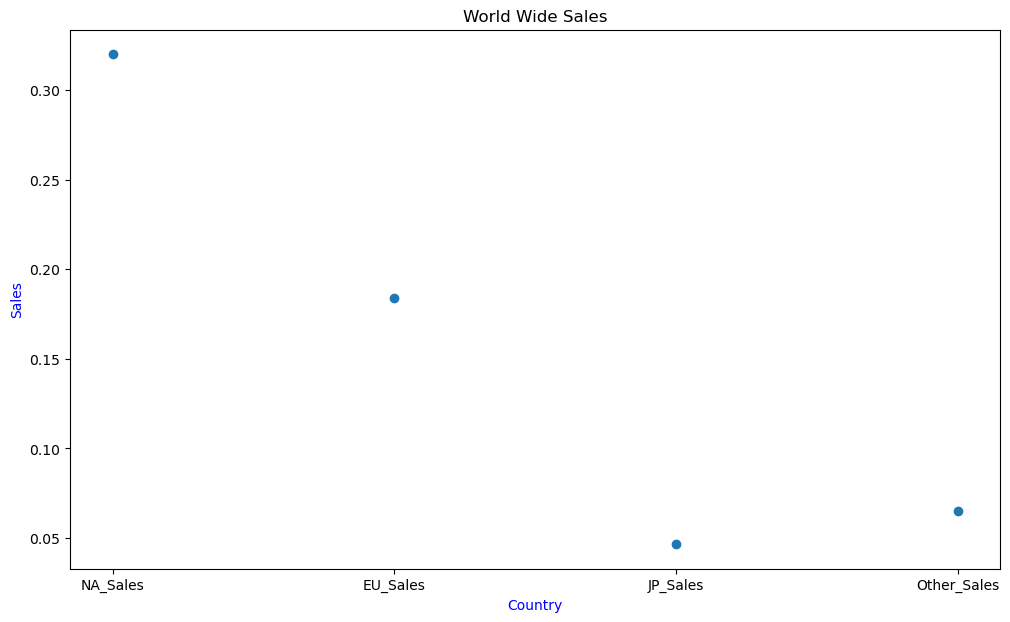

In [38]:
plt.figure(figsize = (12, 7))
x = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
y = [df["NA_Sales"].mean(), df["EU_Sales"].mean(), df["JP_Sales"].mean(), df["Other_Sales"].mean()]
plt.title("World Wide Sales")
plt.ylabel("Sales",  color = "Blue")
plt.xlabel("Country", color = "Blue")
plt.scatter(x,y)
plt.show()

# Which type of game is being made the most globally

In [39]:
df["Genre"].value_counts()

Action          2135
Sports          1471
Shooter          995
Misc             857
Racing           849
Role-Playing     764
Platform         559
Simulation       555
Fighting         430
Adventure        430
Puzzle           330
Strategy         330
Name: Genre, dtype: int64

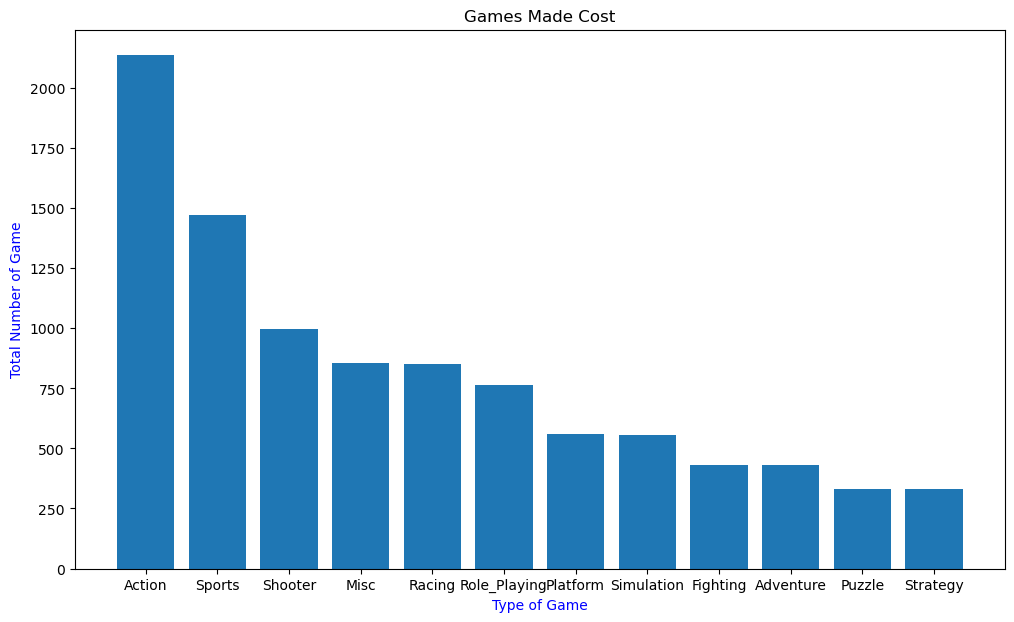

In [41]:
plt.figure(figsize = (12, 7))
x = ['Action', 'Sports', 'Shooter', 'Misc', 'Racing', 'Role_Playing', 'Platform', 'Simulation', 'Fighting', 'Adventure', 'Puzzle', 'Strategy']
y = df['Genre'].value_counts()
plt.title("Games Made Cost")
plt.ylabel("Total Number of Game", color = "Blue")
plt.xlabel("Type of Game", color = "Blue")
plt.bar(x,y)
plt.show()

# Which type of game is selling the most globally?

In [44]:
df[["Global_Sales", "Genre"]].value_counts()

Global_Sales  Genre   
0.06          Action      68
0.03          Action      68
0.02          Action      67
0.04          Action      61
0.02          Shooter     58
                          ..
1.48          Fighting     1
              Misc         1
              Racing       1
              Sports       1
82.53         Sports       1
Length: 2066, dtype: int64

<Figure size 1200x1500 with 0 Axes>

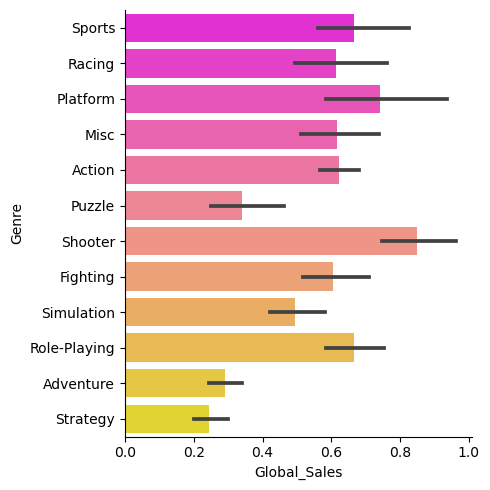

In [45]:
plt.figure(figsize = (12, 15))
sns.catplot(data = df, x = "Global_Sales", y = "Genre", kind = "bar", palette = "spring")
plt.tight_layout()
plt.show()

# Compare global sales in 3 decades

In [47]:
df_Eighties = df[(df["Year"]>=1980) & (df["Year"]<=1989)]
df_Nineties = df[(df["Year"]>=1990) & (df["Year"]<=1999)]
df_Twenties = df[(df["Year"]>=2000)]

In [48]:
df_Eighties

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14472,Alter Ego,PC,1985,Simulation,Activision,0.0,0.03,0.0,0.01,0.03,59.0,9.0,5.8,19.0,"Viva Media, Viva Media, LLC",T
14623,SimCity,PC,1988,Simulation,Maxis,0.0,0.02,0.0,0.01,0.03,64.0,75.0,2.2,4572.0,Maxis,E10+


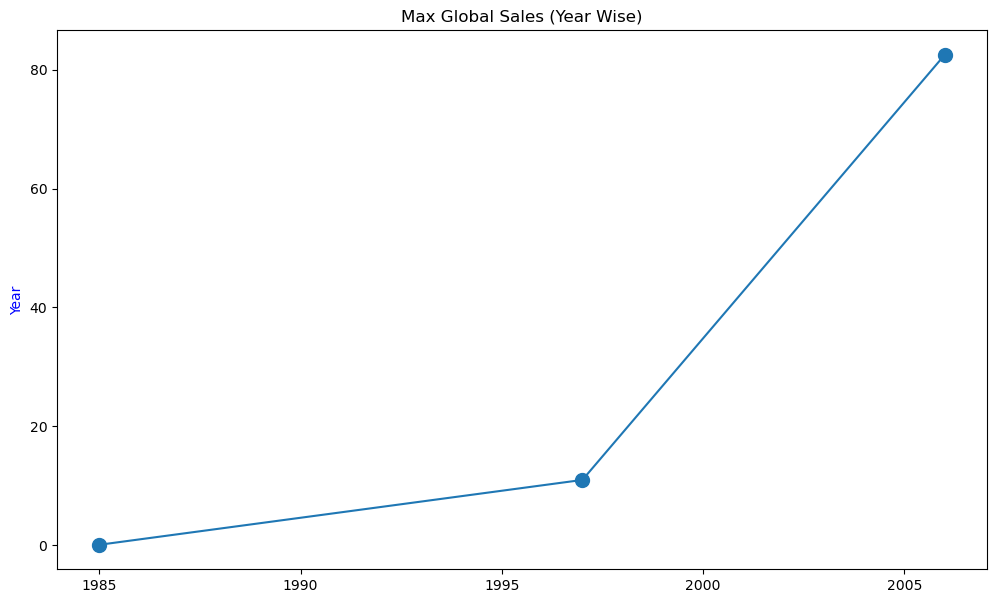

In [53]:
plt.figure(figsize = (12, 7))

x = [df_Eighties.loc[df_Eighties["Global_Sales"].idxmax()][2], df_Nineties.loc[df_Nineties["Global_Sales"].idxmax()][2], df_Twenties.loc[df_Twenties["Global_Sales"].idxmax()][2]]
y = [df_Eighties["Global_Sales"].max(), df_Nineties["Global_Sales"].max(), df_Twenties["Global_Sales"].max()]
plt.title("Max Global Sales (Year Wise)")
plt.ylabel("Sales", color = "blue")
plt.ylabel("Year", color = "blue")
plt.plot(x,y, marker = "o", ms=10)
plt.show()

# Whic type of Games in most in the word?

In [56]:
df_Twenties["Genre"].value_counts()

Action          2121
Sports          1467
Shooter          988
Misc             854
Racing           841
Role-Playing     743
Platform         553
Simulation       548
Adventure        426
Fighting         421
Puzzle           327
Strategy         319
Name: Genre, dtype: int64

In [58]:
df_Eighties["Genre"].value_counts()

Simulation    2
Name: Genre, dtype: int64

# Game Sales in the Twenties

In [59]:
df_Twenties["Genre"].value_counts()

Action          2121
Sports          1467
Shooter          988
Misc             854
Racing           841
Role-Playing     743
Platform         553
Simulation       548
Adventure        426
Fighting         421
Puzzle           327
Strategy         319
Name: Genre, dtype: int64

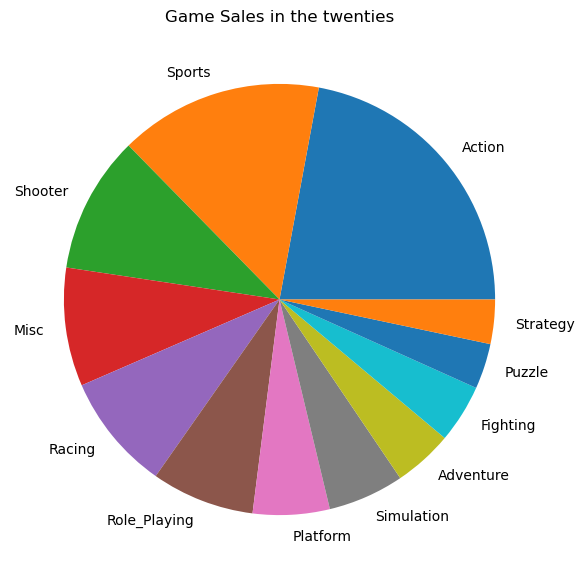

In [61]:
plt.figure(figsize = (12, 7))
x = ["Action", "Sports", "Shooter", "Misc", "Racing", "Role_Playing", "Platform", "Simulation", "Adventure", "Fighting", "Puzzle", "Strategy"]
y = df_Twenties["Genre"].value_counts()
plt.title("Game Sales in the twenties")
plt.pie(y, labels = x)
plt.show()

# Game Sales in the Nineties

In [62]:
df_Nineties["Genre"].value_counts()

Role-Playing    21
Action          14
Strategy        11
Fighting         9
Racing           8
Shooter          7
Platform         6
Simulation       5
Sports           4
Adventure        4
Misc             3
Puzzle           3
Name: Genre, dtype: int64

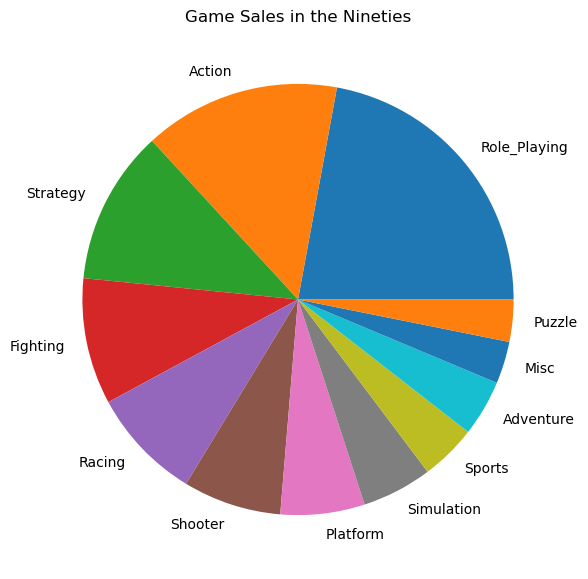

In [65]:
plt.figure(figsize = (12, 7))
x = ["Role_Playing", "Action", "Strategy", "Fighting", "Racing", "Shooter", "Platform", "Simulation", "Sports", "Adventure", "Misc", "Puzzle"]
y = df_Nineties["Genre"].value_counts()
plt.title("Game Sales in the Nineties")
plt.pie(y, labels = x)
plt.show()

# Game sales in the Eighties

In [66]:
df_Eighties["Genre"].value_counts()

Simulation    2
Name: Genre, dtype: int64

In [69]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


# If I create  a new agme then in which part of the world will be more profitable to launce

In [70]:
df_Twenties.loc[df["NA_Sales"].idxmax()]

Name            Wii Sports
Platform               Wii
Year                  2006
Genre               Sports
Publisher         Nintendo
NA_Sales             41.36
EU_Sales             28.96
JP_Sales              3.77
Other_Sales           8.45
Global_Sales         82.53
Critic_Score          76.0
Critic_Count          51.0
User_Score               8
User_Count           322.0
Developer         Nintendo
Rating                   E
Name: 0, dtype: object

If I launce a game in North America I should make a sports genre game because it is more profitable

# If I create a new game then in which part of the world will it be more profitable to launce

In [72]:
df_Twenties.loc[df["EU_Sales"].idxmax()]

Name            Wii Sports
Platform               Wii
Year                  2006
Genre               Sports
Publisher         Nintendo
NA_Sales             41.36
EU_Sales             28.96
JP_Sales              3.77
Other_Sales           8.45
Global_Sales         82.53
Critic_Score          76.0
Critic_Count          51.0
User_Score               8
User_Count           322.0
Developer         Nintendo
Rating                   E
Name: 0, dtype: object

If I launce a game in Europe I should make a sports genre game because it is more profitable

# If I create a new game then in which part of the eorld will it be more profitsble to launce

In [73]:
df_Twenties.loc[df["JP_Sales"].idxmax()]

Name            New Super Mario Bros.
Platform                           DS
Year                             2006
Genre                        Platform
Publisher                    Nintendo
NA_Sales                        11.28
EU_Sales                         9.14
JP_Sales                          6.5
Other_Sales                      2.88
Global_Sales                     29.8
Critic_Score                     89.0
Critic_Count                     65.0
User_Score                        8.5
User_Count                      431.0
Developer                    Nintendo
Rating                              E
Name: 6, dtype: object

If I launce a game in Japan I should make a platform genre game because it is more profitable

# Which game has the highest critic score

In [75]:
df.loc[df["Critic_Score"].idxmax()]

Name             Grand Theft Auto IV
Platform                        X360
Year                            2008
Genre                         Action
Publisher       Take-Two Interactive
NA_Sales                        6.76
EU_Sales                        3.07
JP_Sales                        0.14
Other_Sales                     1.03
Global_Sales                   11.01
Critic_Score                    98.0
Critic_Count                    86.0
User_Score                       7.9
User_Count                    2951.0
Developer             Rockstar North
Rating                             M
Name: 51, dtype: object

Grand Theft Auto IV has the highest critic score

# Making a new dataset without "tbd" string in User_Score Column

In [76]:
df[df["User_Score"]=="tbd"].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
119,Zumba Fitness,Wii,2010,Sports,505 Games,3.45,2.59,0.0,0.66,6.71,69.001396,26.562778,tbd,163.521008,"Pipeworks Software, Inc.",E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,Namco Bandai Games,2.08,1.35,0.0,0.54,3.98,61.000000,21.000000,tbd,163.521008,Digital Eclipse,E10+
520,Zumba Fitness 2,Wii,2011,Sports,Majesco Entertainment,1.51,1.03,0.0,0.27,2.81,69.001396,26.562778,tbd,163.521008,"Majesco Games, Majesco",T
645,uDraw Studio,Wii,2010,Misc,THQ,1.65,0.57,0.0,0.20,2.42,71.000000,9.000000,tbd,163.521008,THQ,E
718,Just Dance Kids,Wii,2010,Misc,Ubisoft,1.52,0.54,0.0,0.18,2.24,69.001396,26.562778,tbd,163.521008,Ubisoft,E


In [77]:
df_User_Score_WO_tbd = df[df["User_Score"].str.contains("tbd")==False]

In [79]:
df_User_Score_WO_tbd.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


# Coverting User_Score Column into float

In [80]:
df_User_Score_WO_tbd["User_Score"] = df_User_Score_WO_tbd["User_Score"].astype(float)

C:\Users\adnan\AppData\Local\Temp\ipykernel_6536\339321632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_User_Score_WO_tbd["User_Score"] = df_User_Score_WO_tbd["User_Score"].astype(float)


In [81]:
df_User_Score_WO_tbd.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [83]:
df_User_Score_WO_tbd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7378 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          7378 non-null   object 
 1   Platform      7378 non-null   object 
 2   Year          7378 non-null   int32  
 3   Genre         7378 non-null   object 
 4   Publisher     7378 non-null   object 
 5   NA_Sales      7378 non-null   float64
 6   EU_Sales      7378 non-null   float64
 7   JP_Sales      7378 non-null   float64
 8   Other_Sales   7378 non-null   float64
 9   Global_Sales  7378 non-null   float64
 10  Critic_Score  7378 non-null   float64
 11  Critic_Count  7378 non-null   float64
 12  User_Score    7378 non-null   float64
 13  User_Count    7378 non-null   float64
 14  Developer     7378 non-null   object 
 15  Rating        7378 non-null   object 
dtypes: float64(9), int32(1), object(6)
memory usage: 951.1+ KB


# Finding the hightes rated user score and making it in a new dataframe

In [84]:
df_User_Score_WO_tbd_highest_rated = df_User_Score_WO_tbd[df_User_Score_WO_tbd["User_Score"]>9.0]

In [85]:
df_User_Score_WO_tbd_highest_rated.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
65,Final Fantasy VII,PS,1997,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72,92.0,20.0,9.2,1282.0,SquareSoft,T
97,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.56,2.35,0.98,0.62,7.51,97.0,87.0,9.1,1854.0,Nintendo EAD Tokyo,E
106,Tekken 3,PS,1998,Fighting,Sony Computer Entertainment,3.27,2.22,1.40,0.29,7.16,96.0,15.0,9.1,367.0,Namco,T
110,Mario Kart 8,WiiU,2014,Racing,Nintendo,3.15,2.15,1.28,0.51,7.09,88.0,82.0,9.1,1599.0,Nintendo,E
111,Super Smash Bros. Melee,GC,2001,Fighting,Nintendo,4.41,1.04,1.39,0.22,7.07,92.0,38.0,9.1,568.0,HAL Labs,T


# Converting Critic Score Column's score out of 10 instead of 100

In [86]:
df_User_Score_WO_tbd_highest_rated["Critic_Score"] = (df_User_Score_WO_tbd_highest_rated["Critic_Score"]/100)*10

C:\Users\adnan\AppData\Local\Temp\ipykernel_6536\1077992101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_User_Score_WO_tbd_highest_rated["Critic_Score"] = (df_User_Score_WO_tbd_highest_rated["Critic_Score"]/100)*10


In [87]:
df_User_Score_WO_tbd_highest_rated.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
65,Final Fantasy VII,PS,1997,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72,9.2,20.0,9.2,1282.0,SquareSoft,T
97,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.56,2.35,0.98,0.62,7.51,9.7,87.0,9.1,1854.0,Nintendo EAD Tokyo,E
106,Tekken 3,PS,1998,Fighting,Sony Computer Entertainment,3.27,2.22,1.40,0.29,7.16,9.6,15.0,9.1,367.0,Namco,T
110,Mario Kart 8,WiiU,2014,Racing,Nintendo,3.15,2.15,1.28,0.51,7.09,8.8,82.0,9.1,1599.0,Nintendo,E
111,Super Smash Bros. Melee,GC,2001,Fighting,Nintendo,4.41,1.04,1.39,0.22,7.07,9.2,38.0,9.1,568.0,HAL Labs,T


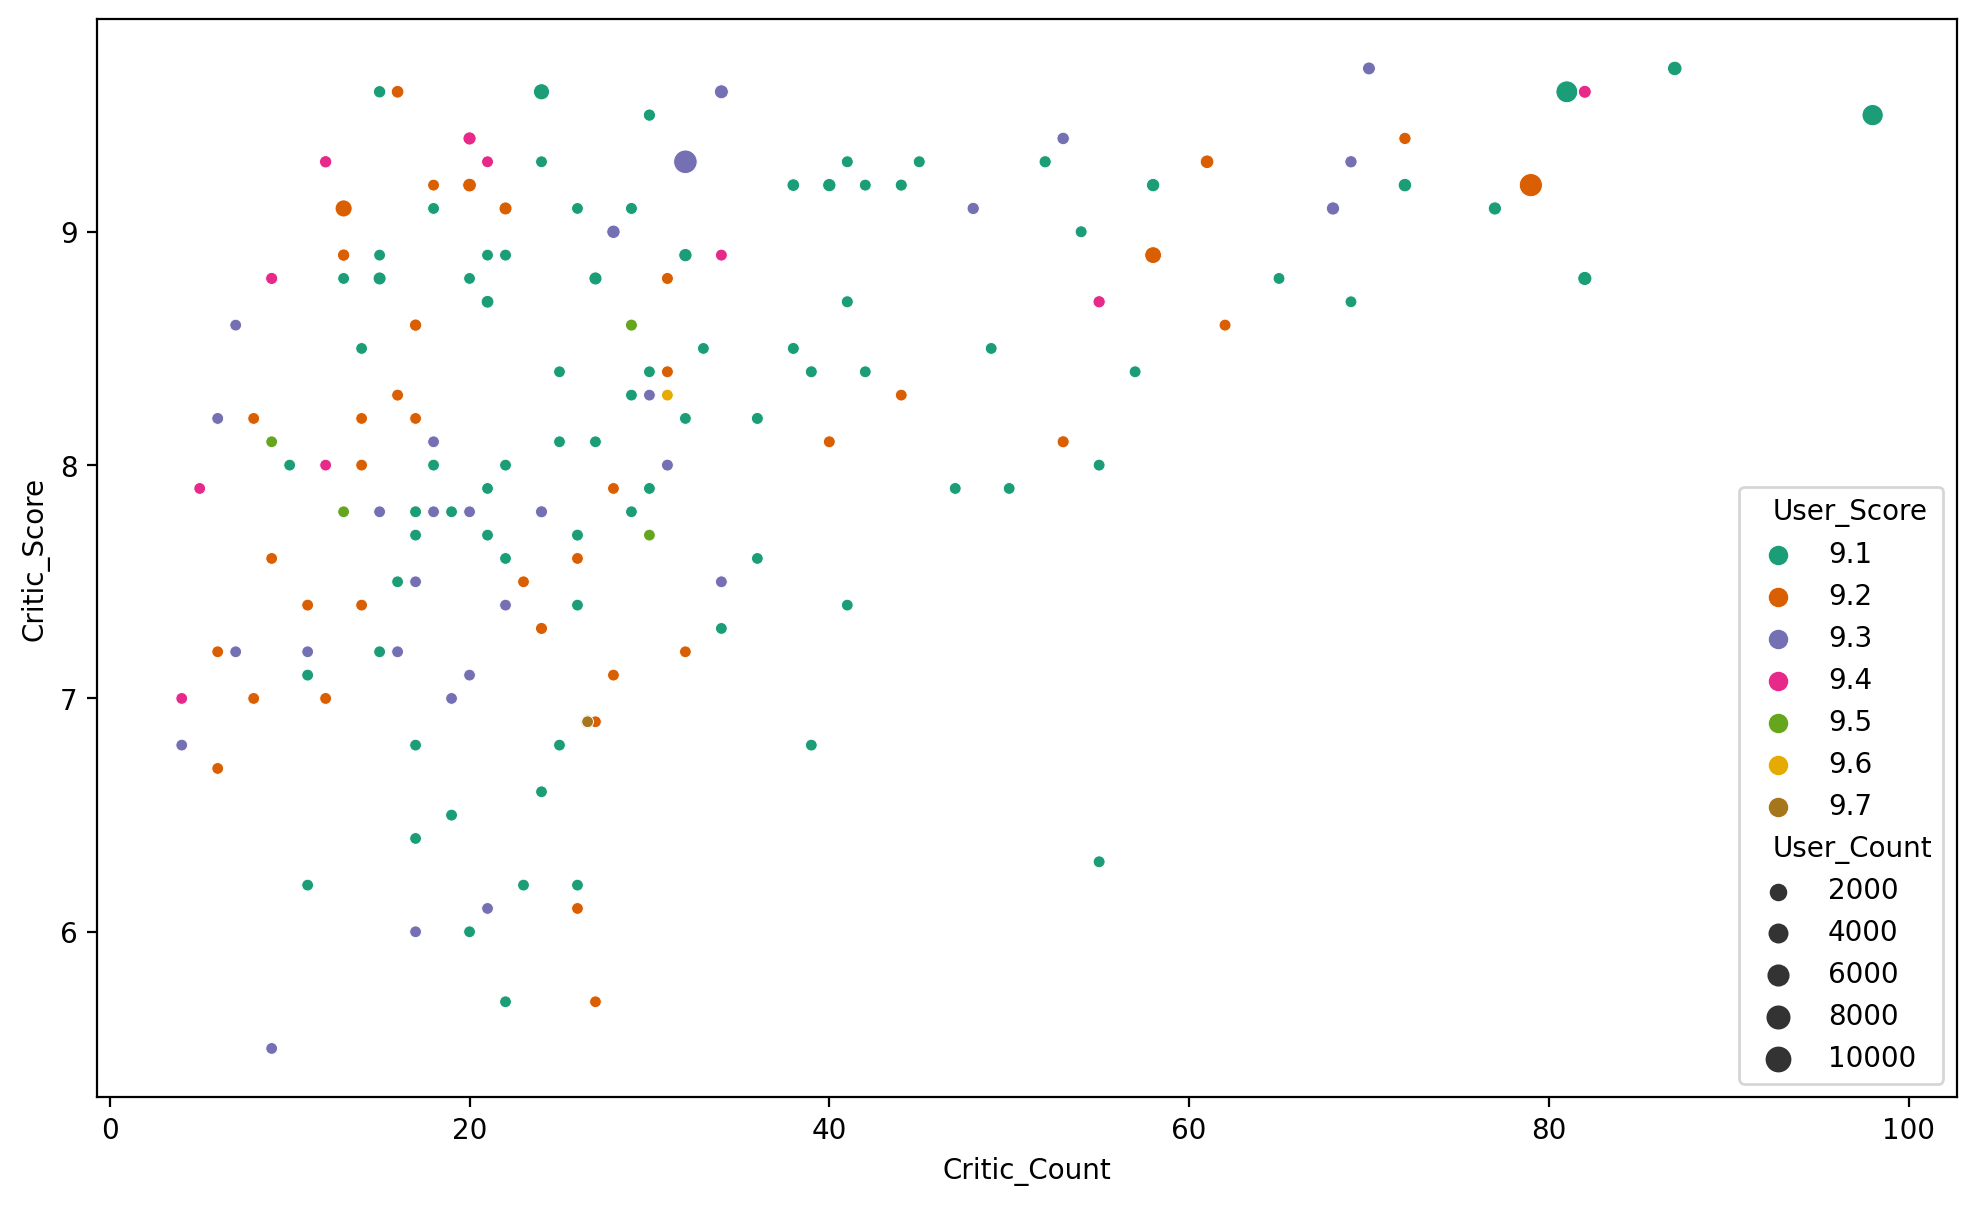

In [88]:
plt.figure(figsize = (12,7),dpi = 200)
sns.scatterplot(data = df_User_Score_WO_tbd_highest_rated,x = "Critic_Count",y = "Critic_Score",hue = "User_Score",size = "User_Count",palette ="Dark2")
plt.show()

In [90]:
df_User_Score_WO_tbd_highest_rated[(df_User_Score_WO_tbd_highest_rated["Critic_Count"]>90) & (df_User_Score_WO_tbd_highest_rated["Critic_Score"]>9) ]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
149,The Last of Us,PS3,2013,Action,Sony Computer Entertainment Europe,2.41,2.18,0.28,0.99,5.87,9.5,98.0,9.1,8003.0,Naughty Dog,M


# Which type of game has the highest user

In [ ]:
sns.catplot(data=df_User_Score_WO_tbd_highest_rated, x="User_Score", y="Genre", kind="bar", palette="spring")


# Hightes user rated games have which type of ratings?

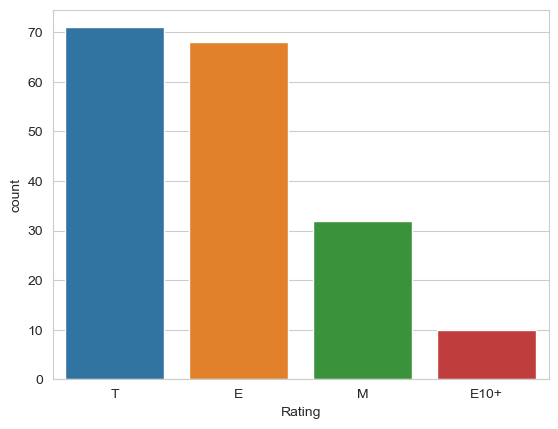

In [91]:
sns.set_style("whitegrid")
sns.countplot(x="Rating", data=df_User_Score_WO_tbd_highest_rated)
plt.show()

#  My Overall Analysis

If we make a new game then we would launch it in North America since globally is selling the most games. Also the Genre of the game will be "Action" as we have seen the trend in the twenties is "Action" genre games. We can make the new game like the "The Last of Us" type of game as it has the highest user score and critic score. Lastly we will make the new game for teens and taken and ESRB rating of "T